In [160]:
import pandas as pd
from datetime import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# https://www.cryptoarchive.com.au/asset/DOGE --> Doge EUR
folderpath = "../../Data/QMEF/"

df = pd.read_csv(folderpath + 'DOGEEUR.csv', sep='|', header=None)

# https://www.cryptoarchive.com.au/faq
df.columns = ['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Taker Buy Quote Asset Volume', 
                'Taker Buy Base Asset Volume', 'Quote Asset Volume', 'Number of trades']

df

,timestamp,Open,High,Low,Close,Volume,Taker Buy Quote Asset Volume,Taker Buy Base Asset Volume,Quote Asset Volume,Number of trades
0,1611921600,0.04684,0.19000,0.03900,0.04183,674203.0,21486.1,436378.1,31633.6,310
1,1611921660,0.04299,0.04304,0.04181,0.04271,292821.5,7092.5,165869.6,12462.6,160
2,1611921720,0.04277,0.04425,0.04270,0.04327,1475794.3,17884.4,414587.7,63464.4,222
3,1611921780,0.04327,0.04439,0.04300,0.04400,568917.0,7729.6,176026.5,24985.7,132
4,1611921840,0.04401,0.04499,0.04327,0.04485,551854.6,9163.8,207721.2,24327.8,152
...,...,...,...,...,...,...,...,...,...,...
1293593,1689601560,0.06244,0.06244,0.06244,0.06244,0.0,0.0,0.0,0.0,0
1293594,1689601620,0.06242,0.06242,0.06242,0.06242,476.0,30.0,476.0,30.0,1
1293595,1689601680,0.06242,0.06242,0.06242,0.06242,0.0,0.0,0.0,0.0,0
1293596,1689601740,0.06243,0.06243,0.06242,0.06242,9142.0,0.0,0.0,571.0,6


In [182]:
df_tweets = pd.read_csv("../../Data/QMEF/tweet_analysis.csv", sep=";", encoding='utf8', parse_dates=['CreatedAt', 'UTC'])
df_tweets.drop_duplicates('TweetId', inplace = True)

df_tweets['timestamp'] = df_tweets['UTC'].apply(lambda x: x.astype('int')//10**9)
df_tweets['timestamp'] = df_tweets['timestamp'] - (df_tweets['timestamp'] % 60) #Abrunden auf Minuten

df_tweets = df_tweets[['UTC', 'timestamp', 'Text', 'Favorites', 'Retweets', 'neg', 'neu', 'pos', 'compound']]
# df_tweets = df_tweets.merge(df_doge, left_on='Date', right_on='Date')
df_tweets_relevant = df_tweets.loc[(df_tweets['Favorites'] >= 500_000) & (df_tweets['Retweets'] >= 100_000)].copy()
df_tweets_relevant = df_tweets_relevant.iloc[0:1]
df_tweets_relevant

,UTC,timestamp,Text,Favorites,Retweets,neg,neu,pos,compound
19,2021-02-04 08:27:10+00:00,1612427220,"No highs, no lows, only Doge",773919,113814,0.253,0.346,0.401,0.0721


C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\154136086.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_prices'] = np.log(doge_sliced['Close'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\154136086.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['dlog_prices'] = [0]*len(doge_sliced['log_prices'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\154136086.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

0.00027201126359627015


C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\154136086.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['dlog_prices_cum'] = np.cumsum(doge_sliced['dlog_prices'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\154136086.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['abnormal_returns'] = doge_sliced['dlog_prices'] - expected_return
C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\154136086.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

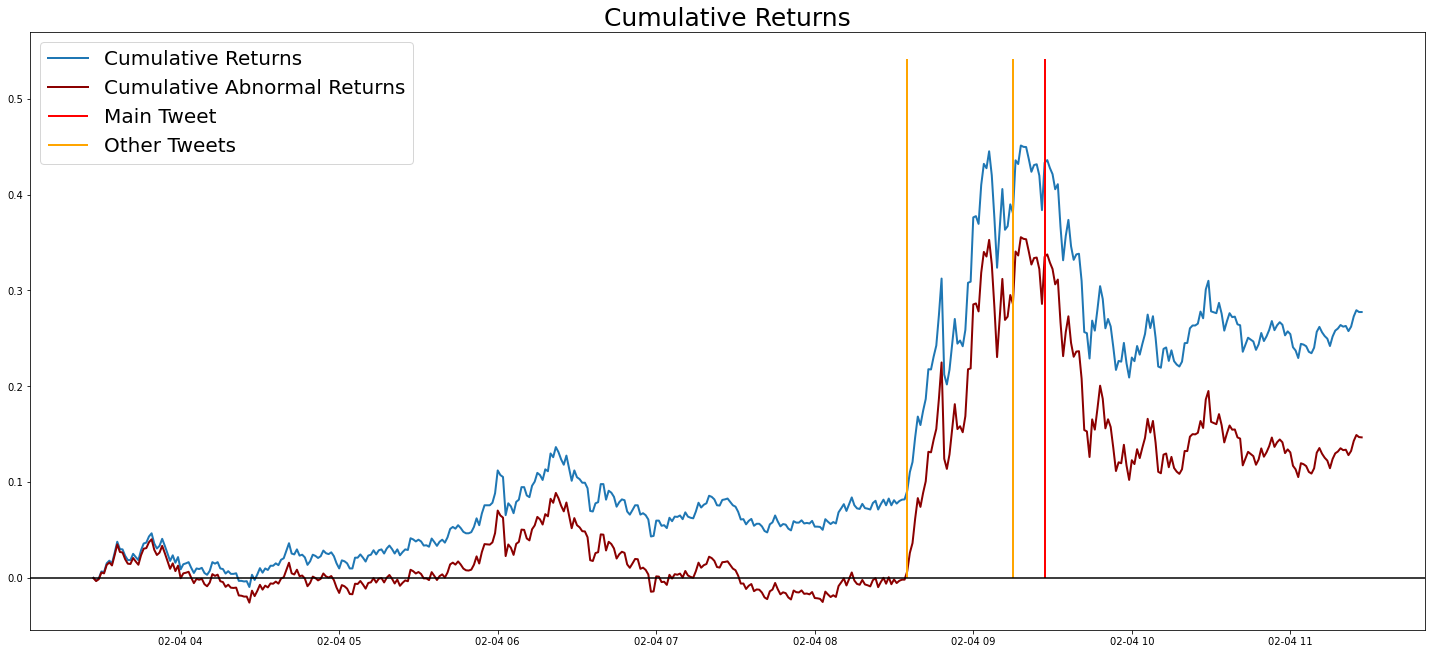

In [193]:
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-360*60) & (df['timestamp'] <= timestamp+120*60)]
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-100*60) & (df_tweets['timestamp'] <= timestamp+100*60)]

    base_value = doge_sliced.iloc[0, 4]
    
    doge_sliced['log_prices'] = np.log(doge_sliced['Close'])
    doge_sliced['dlog_prices'] = [0]*len(doge_sliced['log_prices'])
    
    # Super ineffizient
    for i in range(1, len(doge_sliced['log_prices'])):
        doge_sliced['dlog_prices'].iloc[i] = doge_sliced['log_prices'].iloc[i] - doge_sliced['log_prices'].iloc[(i-1)]

    doge_sliced['dlog_prices_cum'] = np.cumsum(doge_sliced['dlog_prices'])

    # Expected Returns which are based on the mean value of the returns of the last 5 hours before the tweet.
    expected_return = np.mean(doge_sliced['dlog_prices'].iloc[0:300])
    print(expected_return)

    # Abnormal Returns based on After Returns - Mean Value of Returns (before Tweet)
    doge_sliced['abnormal_returns'] = doge_sliced['dlog_prices'] - expected_return
    doge_sliced['abnormal_returns_cum'] = np.cumsum(doge_sliced['abnormal_returns'])

    # doge_sliced['CAR'] = doge_sliced['Close']/base_value

    fig = plt.figure(1, figsize = (25, 11))
    plt.plot(doge_sliced["Date"], doge_sliced['dlog_prices_cum'], lw=2, label='Cumulative Returns')
    plt.plot(doge_sliced["Date"], doge_sliced['abnormal_returns_cum'], lw=2, label='Cumulative Abnormal Returns', color='darkred')
    plt.vlines(dt.fromtimestamp(timestamp), label='Main Tweet', ymin=0, ymax=doge_sliced['dlog_prices_cum'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        plt.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['dlog_prices_cum'].max()*1.2, colors='orange', lw=2) 
    plt.axhline(0, color = 'black')
    plt.legend(loc='best', fontsize=20)
    plt.title('Cumulative Returns', size=25)

    plt.show()

    #print(tweet['Text'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


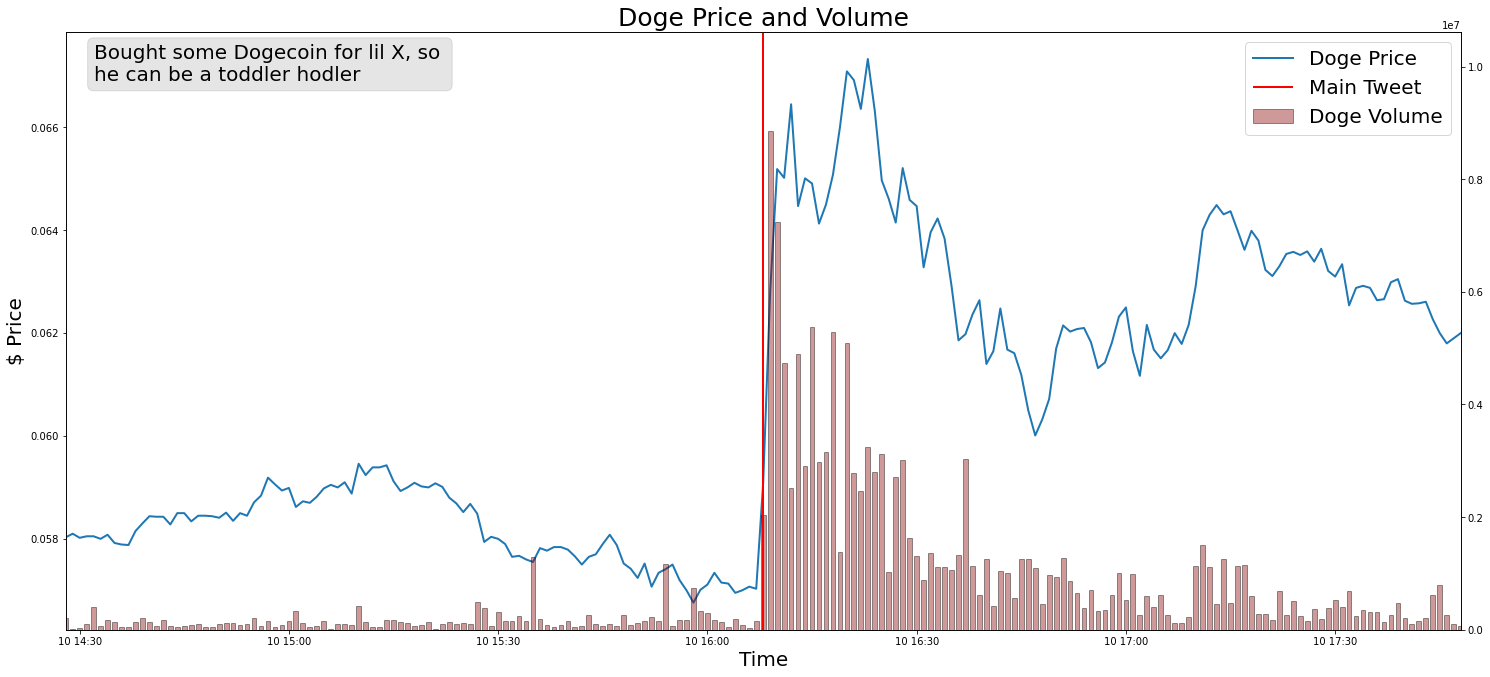

C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


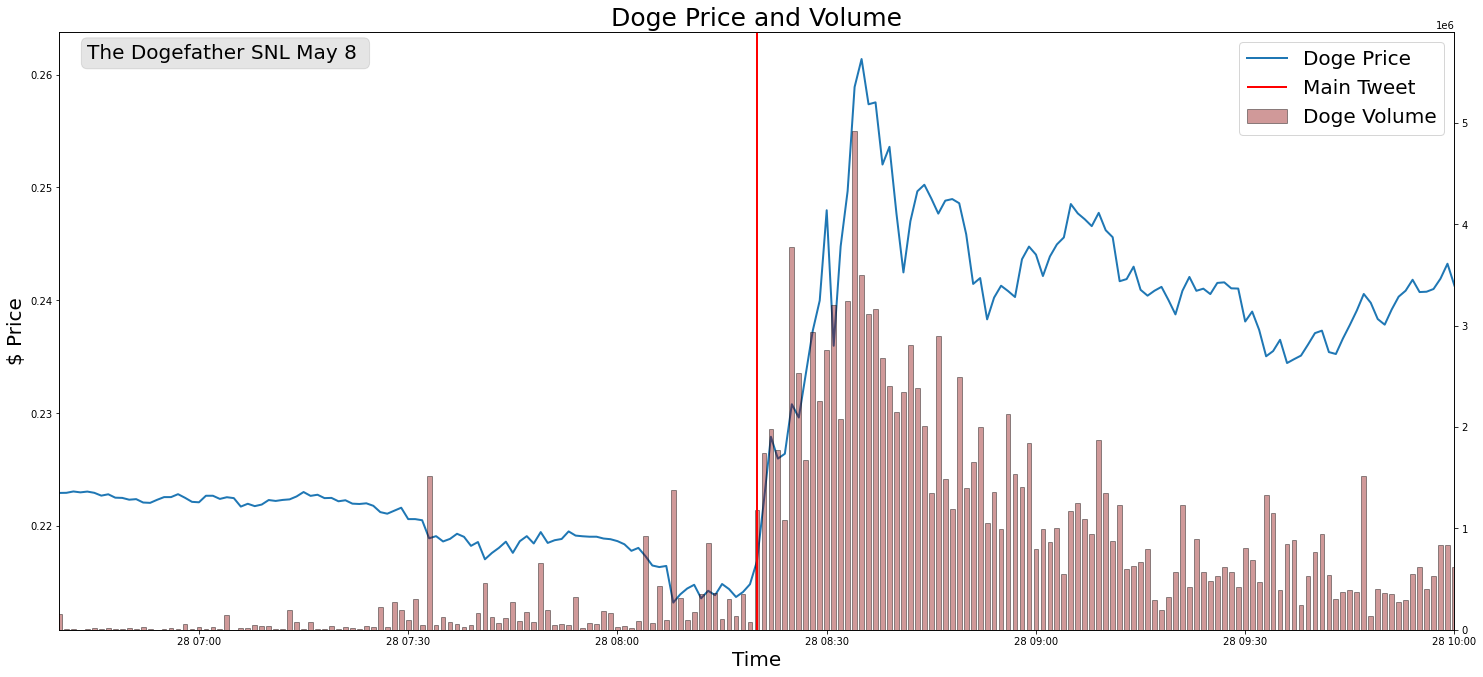

C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


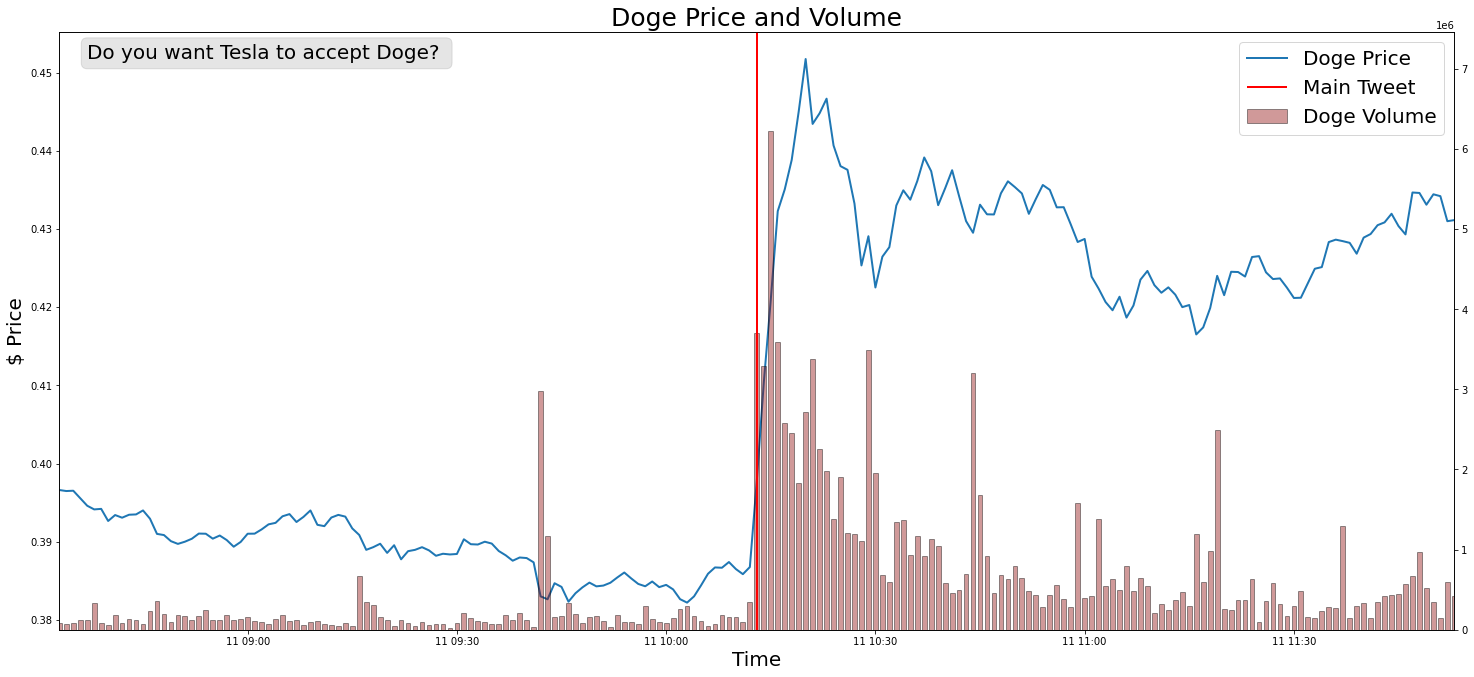

C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


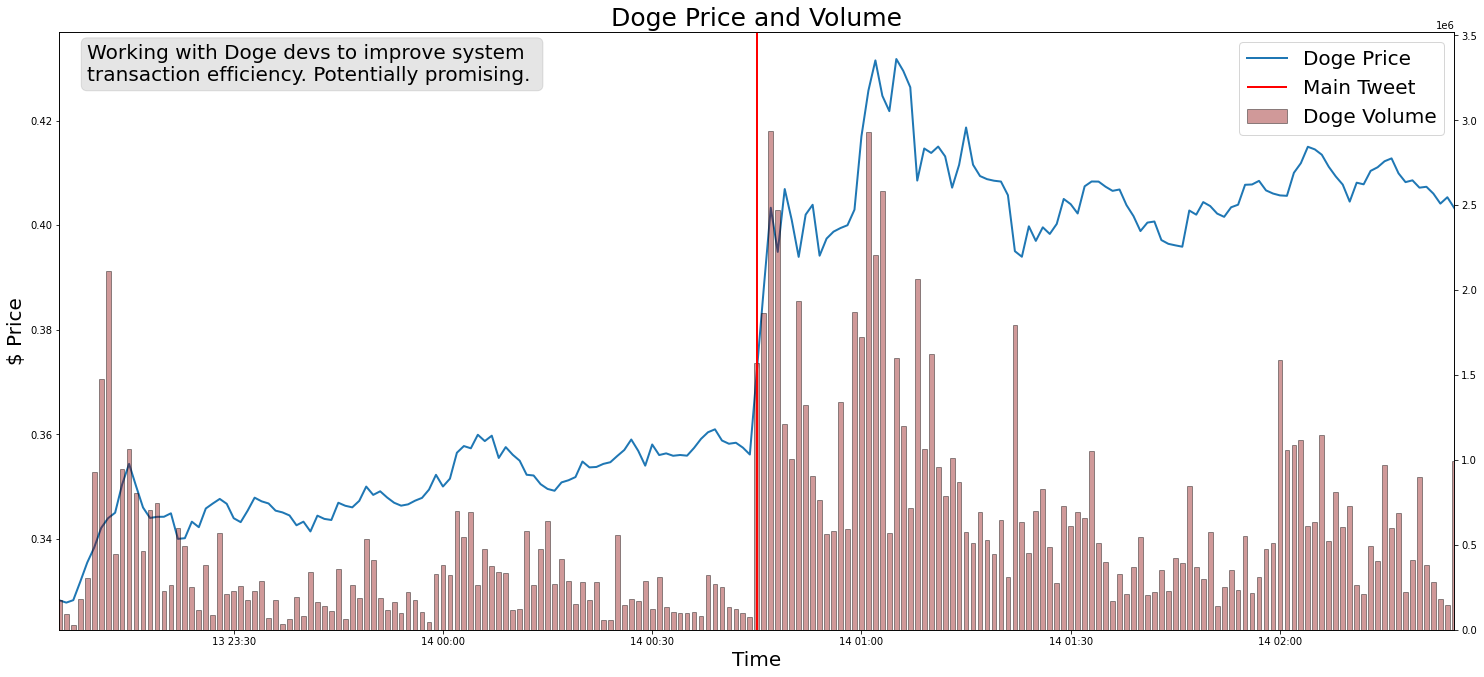

C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


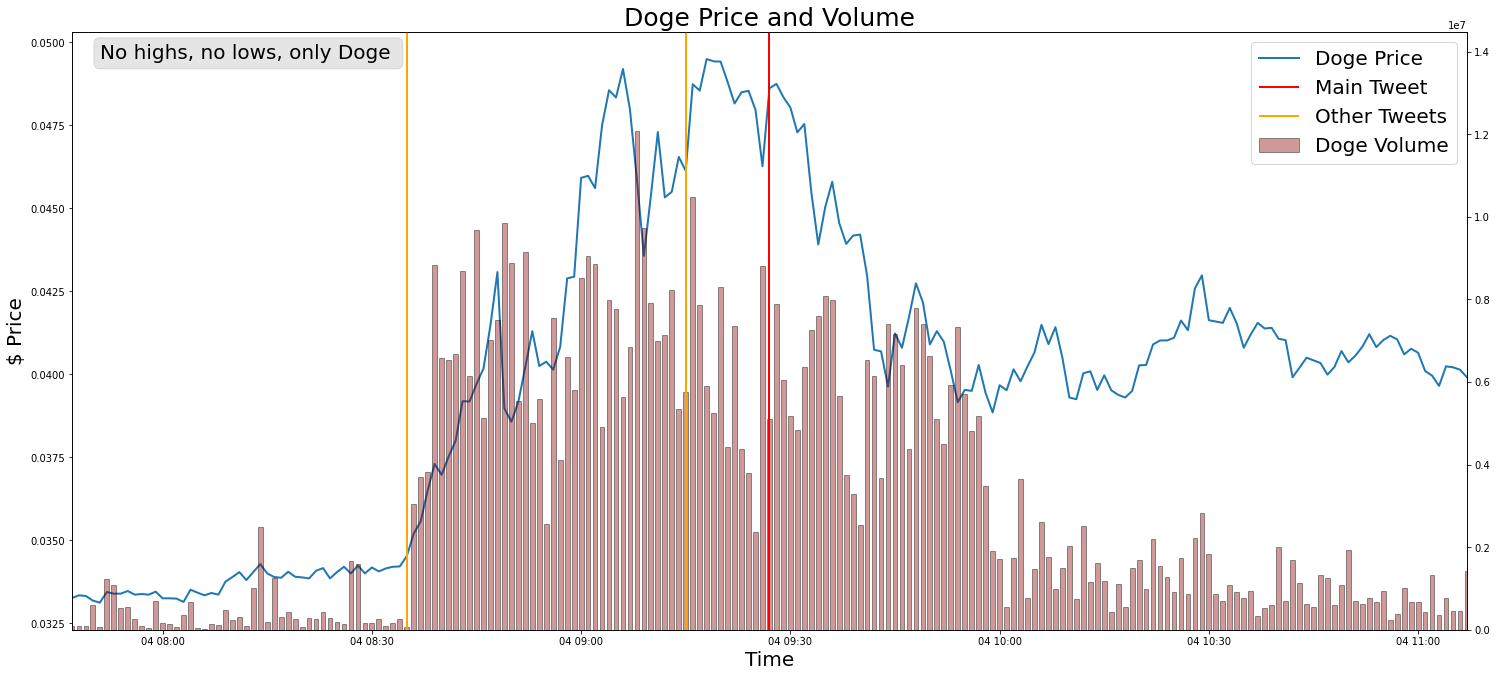

C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


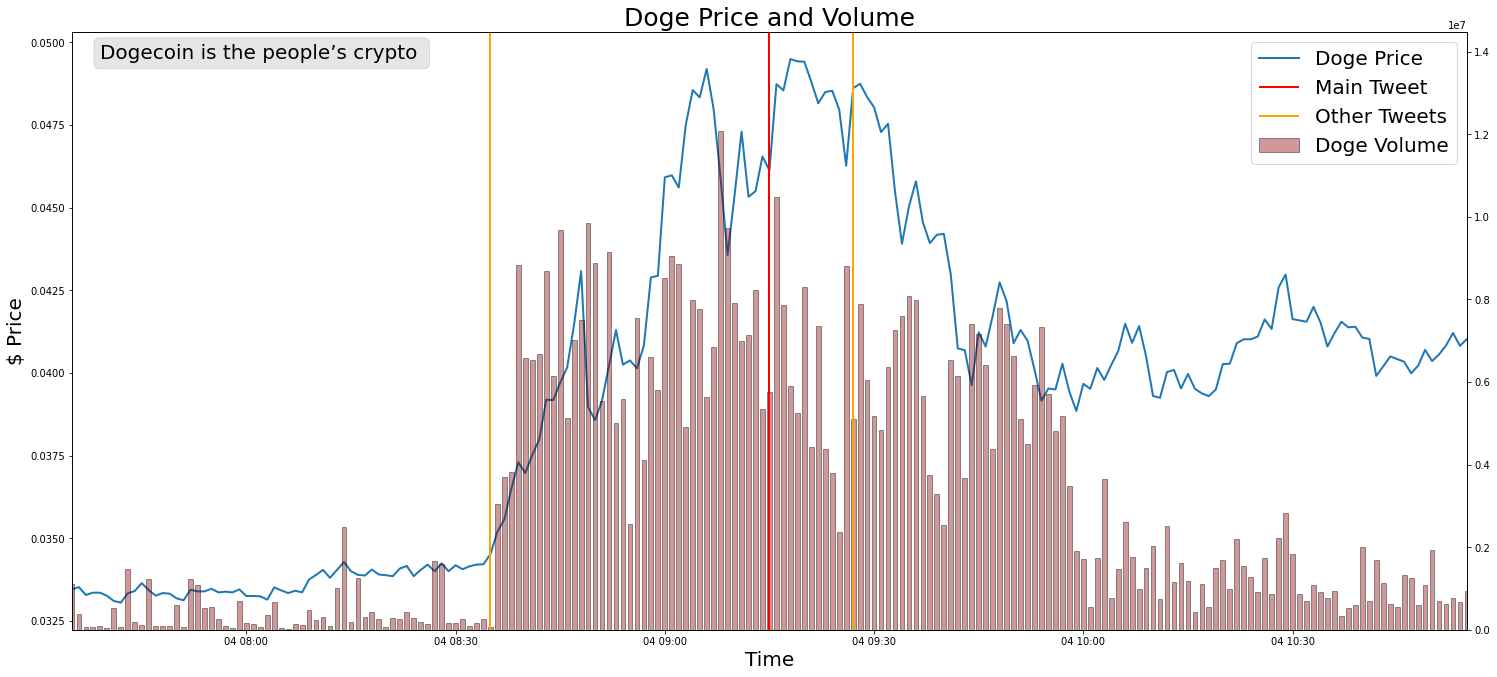

C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


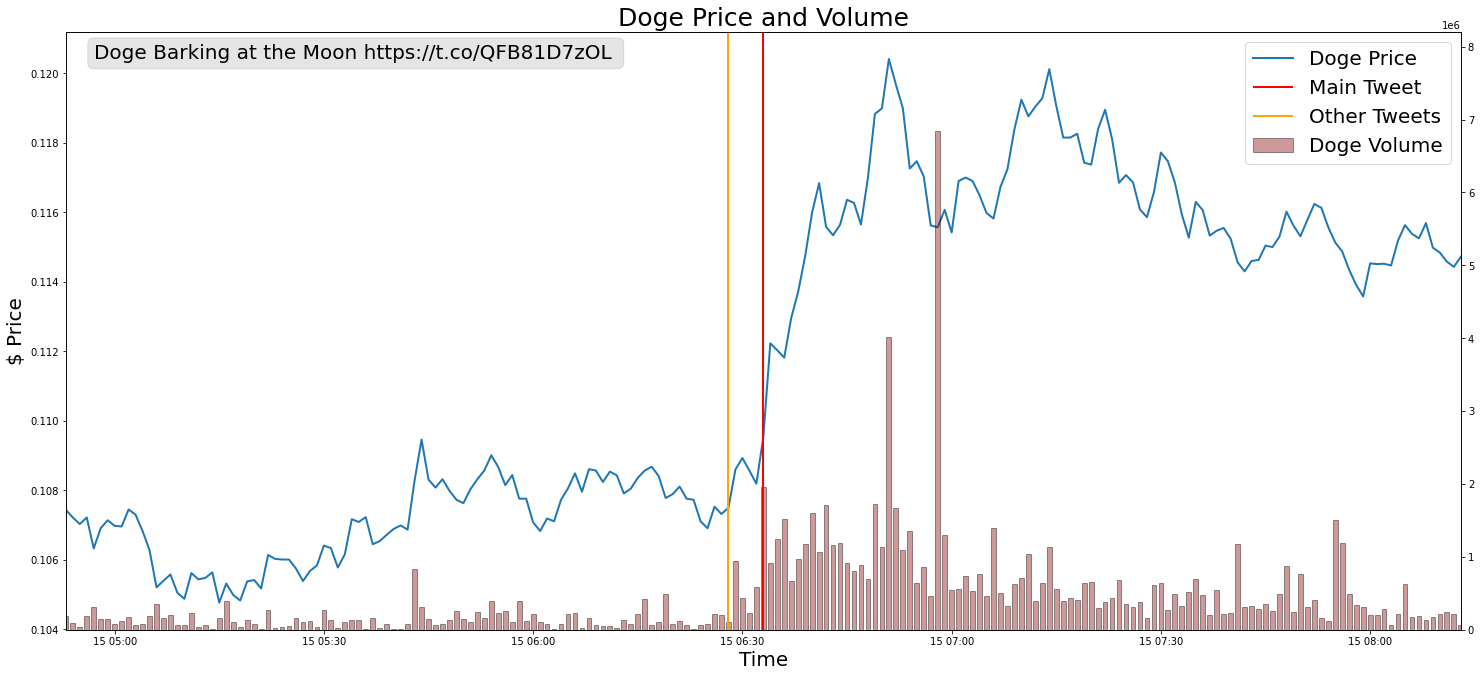

C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


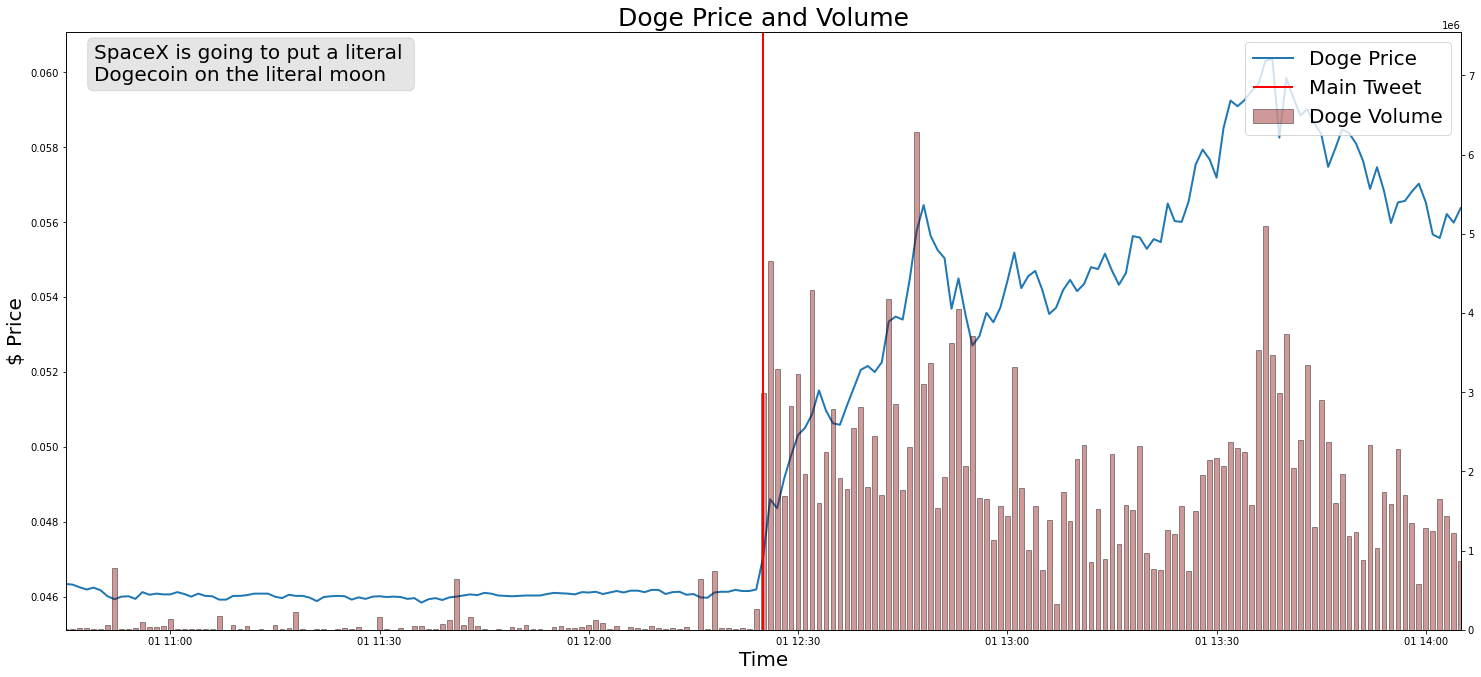

C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


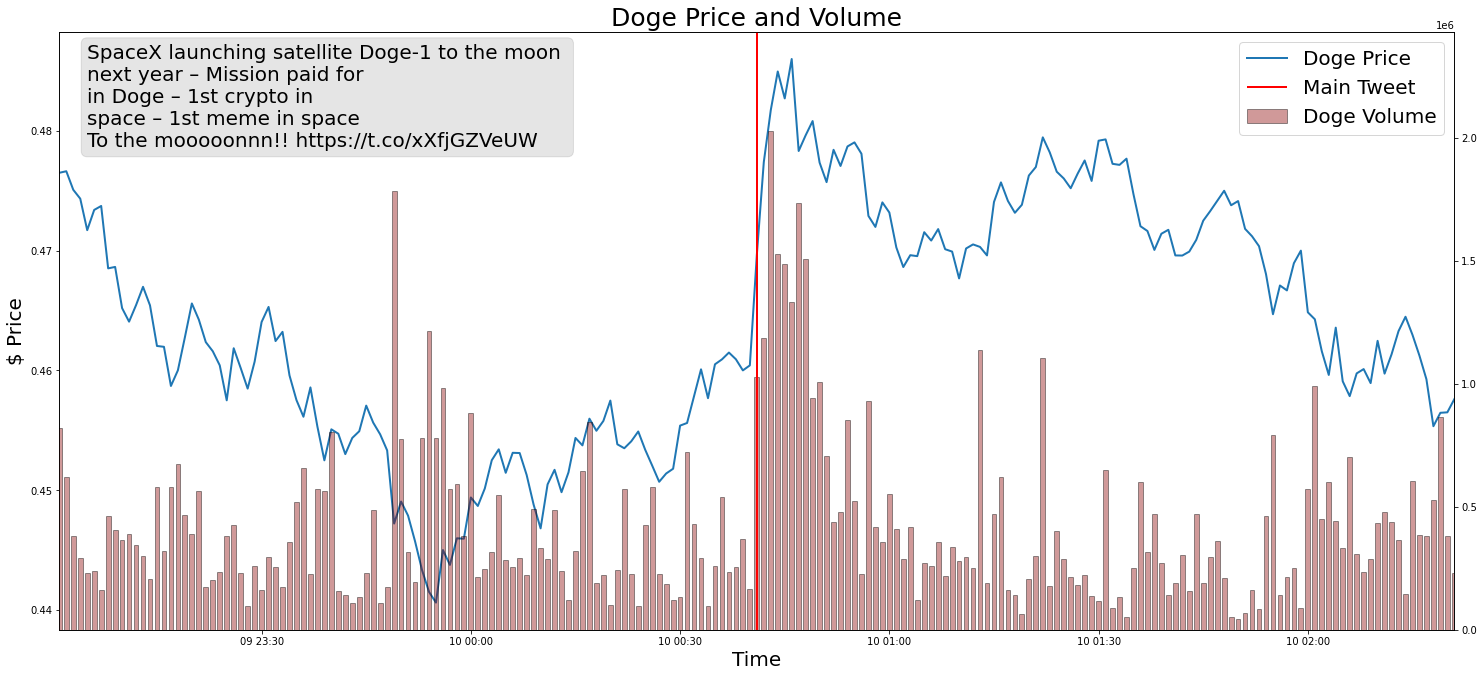

C:\Users\Admin\AppData\Local\Temp\ipykernel_18400\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


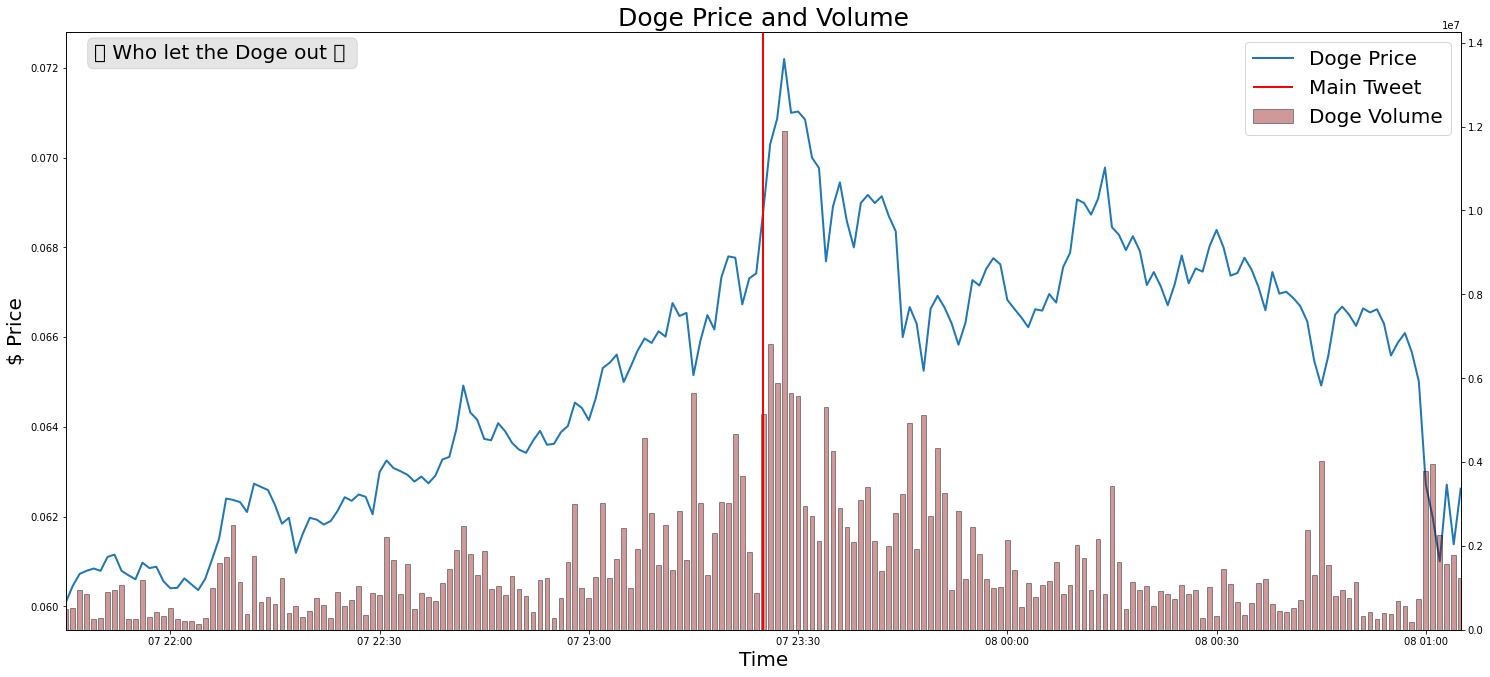

In [153]:
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-100*60) & (df['timestamp'] <= timestamp+100*60)]
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-100*60) & (df_tweets['timestamp'] <= timestamp+100*60)]

    base_value = doge_sliced.iloc[0, 4]
    doge_sliced['CAR'] = doge_sliced['Close']/base_value

    fig = plt.figure(1, figsize = (25, 11))
    ax = fig.add_subplot(111)
    ax.plot(doge_sliced['Date'], doge_sliced['Close'], lw=2, label="Doge Price")

    ax2 = ax.twinx()
    ax2.bar(doge_sliced['Date'], doge_sliced['Volume'], label="Doge Volume", color='darkred', alpha=0.4, width=1/(35*60), edgecolor='black')
    ax2.vlines(dt.fromtimestamp(timestamp), label='Main Tweet', ymin=0, ymax=doge_sliced['Volume'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        ax2.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['Volume'].max()*1.2, colors='orange', lw=2) 
   
    ax2.set_ylim(0, doge_sliced['Volume'].max()*1.2)
    ax.set_xlim(min(doge_sliced['Date']), max(doge_sliced['Date']))
    ax.set_xlabel("Time", size=20)
    ax.set_ylabel("$ Price", size=20)

    t = [i + ' ' for i in tweet['Text'].split()]
    for i in range(7, len(t), 7):
        t.insert(i, '\n')
    anno = ''.join(t)

    ax.text(0.02, 0.98, anno, transform=ax.transAxes, bbox={'boxstyle':'round', 'facecolor':'black', 'alpha':0.1}, fontsize = 20, va='top')
    

    li, la = ax.get_legend_handles_labels()
    li2, la2 = ax2.get_legend_handles_labels()
    plt.legend(li+li2, la+la2, loc='best', fontsize = 20)
    # plt.legend(loc='best', fontsize=20)
    plt.title('Doge Price and Volume', size=25)

    plt.show()

    #print(tweet['Text'])

In [ ]:
m = min(df_tweets['timestamp'])
min(df[df['timestamp'] > m]['Volume'])

0.0